In [63]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [64]:
dataset = pd.read_csv("D:\Data Science\Datasets\combined_data.csv")

In [65]:
sentences = dataset['text'].tolist()
labels = dataset['sentiment'].tolist()

In [66]:
train_size = int(len(sentences) *0.8)

In [67]:
train_sentences = sentences[0:train_size]
train_labels = labels[0:train_size]
test_sentences = sentences[train_size:]
test_labels = labels[train_size:]

In [68]:
train_label_fin = np.array(train_labels)
test_label_fin = np.array(test_labels)

In [69]:
vocab_size = 500
embedding_dim = 16
max_length = 50
trunc_type = 'post'
padding_type = 'post'
oov_tok = "<OOV>"

In [70]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token = oov_tok)
tokenizer.fit_on_texts(train_sentences)

word_index = tokenizer.word_index
train_sequences = tokenizer.texts_to_sequences(train_sentences)
train_padding = pad_sequences(train_sequences, maxlen = max_length, padding = padding_type,
                              truncating = trunc_type)

test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_padding = pad_sequences(test_sequences, maxlen = max_length, padding = padding_type,
                             truncating = trunc_type)

In [71]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

In [72]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [73]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 50, 16)            8000      
                                                                 
 global_average_pooling1d_3  (None, 16)                0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_6 (Dense)             (None, 6)                 102       
                                                                 
 dense_7 (Dense)             (None, 1)                 7         
                                                                 
Total params: 8109 (31.68 KB)
Trainable params: 8109 (31.68 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [74]:
num_epochs = 30
history = model.fit(train_padding, train_label_fin, epochs = num_epochs, validation_data = (test_padding, test_label_fin))

Epoch 1/30
50/50 [==============================] - 1s 3ms/step - loss: 0.6926 - accuracy: 0.5166 - val_loss: 0.6945 - val_accuracy: 0.4110
Epoch 2/30
50/50 [==============================] - 0s 1ms/step - loss: 0.6903 - accuracy: 0.5223 - val_loss: 0.6957 - val_accuracy: 0.4135
Epoch 3/30
50/50 [==============================] - 0s 1ms/step - loss: 0.6877 - accuracy: 0.5311 - val_loss: 0.6938 - val_accuracy: 0.4361
Epoch 4/30
50/50 [==============================] - 0s 1ms/step - loss: 0.6841 - accuracy: 0.5800 - val_loss: 0.6920 - val_accuracy: 0.4662
Epoch 5/30
50/50 [==============================] - 0s 1ms/step - loss: 0.6786 - accuracy: 0.5951 - val_loss: 0.6850 - val_accuracy: 0.5313
Epoch 6/30
50/50 [==============================] - 0s 1ms/step - loss: 0.6713 - accuracy: 0.6648 - val_loss: 0.6804 - val_accuracy: 0.5514
Epoch 7/30
50/50 [==============================] - 0s 1ms/step - loss: 0.6613 - accuracy: 0.6824 - val_loss: 0.6694 - val_accuracy: 0.6190
Epoch 8/30
50/50 [==

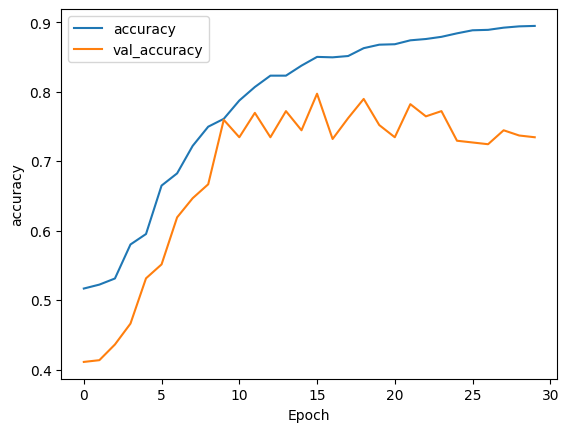

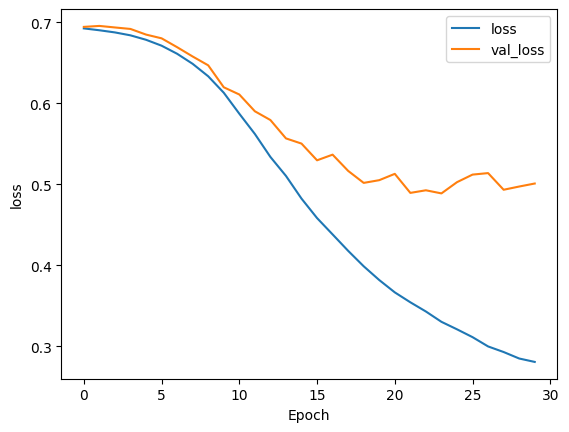

In [75]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epoch")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

3 below codings are for vizing them in: https://projector.tensorflow.org/

In [76]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape)

(500, 16)


In [77]:
import io
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

out_v = io.open('vecs.tsv', 'w', encoding = 'utf-8')
out_m = io.open('meta.tsv', 'w', encoding = 'utf-8')
for word_num in range(1, vocab_size):
    word = reverse_word_index[word_num]
    embeddings = weights[word_num]
    out_m.write(word + "\n")
    out_v.write('\t'.join([str(x) for x in embeddings]) + '\n')
out_v.close()
out_m.close()

In [78]:
from IPython.display import FileLink
import os

vecs_file = 'vecs.tsv'
meta_file = 'meta.tsv'

if os.path.exists(vecs_file):
    display(FileLink(vecs_file))
else:
    print(f"{vecs_file} not found.")

if os.path.exists(meta_file):
    display(FileLink(meta_file))
else:
    print(f"{meta_file} not found.")

C:\Users\Harivenkat\my_project\hvenv\Data science\vecs.tsv

C:\Users\Harivenkat\my_project\hvenv\Data science\meta.tsv

Prediction.............

In [79]:
fake_reviews = ['I love this phone', 'I hate spaghetti', 
                'Everything was cold',
                'Everything was hot exactly as I wanted', 
                'Everything was green', 
                'the host seated us immediately',
                'they gave us free chocolate cake', 
                'not sure about the wilted flowers on the table',
                'only works when I stand on tippy toes', 
                'does not work when I stand on my head']

In [80]:
padding_type = 'post'
sample_sequences = tokenizer.texts_to_sequences(fake_reviews)
fake_pad = pad_sequences(sample_sequences, padding = padding_type, maxlen = max_length)

In [83]:
print("Value close to 1 - positive, \nValue close to 0 - negative, \n0.5 - ambiguous")

classes = model.predict(fake_pad)

for x in range(len(fake_reviews)):
    print(fake_reviews[x])
    print(classes[x])
    print("\n")

Value close to 1 - positive, 
Value close to 0 - negative, 
0.5 - ambiguous
1/1 [==============================] - 0s 24ms/step
I love this phone
[0.89368695]


I hate spaghetti
[0.21749732]


Everything was cold
[0.6119154]


Everything was hot exactly as I wanted
[0.4538913]


Everything was green
[0.6119154]


the host seated us immediately
[0.59690744]


they gave us free chocolate cake
[0.8283504]


not sure about the wilted flowers on the table
[0.13515812]


only works when I stand on tippy toes
[0.81606734]


does not work when I stand on my head
[0.03357479]


